In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#os.getcwd()
os.chdir("C:\\Users\\Mommy\\Desktop\\Self_Learning\\yelp")

In [3]:
yelp_data = pd.read_csv("yelp.csv")

In [4]:
#yelp_data.head(10)
yelp_data.shape

(10000, 10)

In [5]:
yelp_data.columns

Index([u'business_id', u'date', u'review_id', u'stars', u'text', u'type',
       u'user_id', u'cool', u'useful', u'funny'],
      dtype='object')

In [6]:
#yelp_data.head(10)

In [7]:
yelp_data.stars.shape

(10000L,)

In [8]:
# Filter data frame to have rows with stars being 5 and 1 only. These are the two classes - success and not success. 
yelp_data1 = yelp_data[yelp_data['stars']==1]

In [9]:
yelp_data2 = yelp_data[yelp_data['stars']==5]

In [10]:
yelp_data1.shape

(749, 10)

In [11]:
yelp_data2.shape

(3337, 10)

In [12]:
yelp_final = pd.merge(yelp_data1, yelp_data2, on='stars')

In [13]:
3337+749

4086

In [14]:
yelp_final = yelp_data.apply(lambda row: row[yelp_data['stars'].isin([5,1])])

In [15]:
# Further you can have yelp_final to have only two columns - the review text and the stars.
# yelp_final.head(10)

In [16]:
yelp_final2 = yelp_final[['stars','text']]

In [17]:
# Split into training and testing datasets : 
# initialize X and Y as series :  

X = yelp_final.text 
Y = yelp_final.stars 

from sklearn.cross_validation import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# check sizes of the train and test datasets
X_train.shape

(3064L,)

In [19]:
Y_train.shape

(3064L,)

In [20]:
X_test.shape

(1022L,)

In [21]:
Y_test.shape

(1022L,)

In [22]:
# check if X is series
type(X_train)

pandas.core.series.Series

In [23]:
type(X_test)

pandas.core.series.Series

In [24]:
# import countVectorizer module from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the model
count_vec = CountVectorizer()

In [25]:
# now we need the coun vectorizer model to learn the vocabulary : 
# we need to first learn the vocabulary of the reviews 
# and then create a document term amtrix - 
# with that we will have the mapping of the occurence of each vocab with its occurence - so as you
# go through the row - you build the review/the statement. 

count_vec.fit(X_train)

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [26]:
# get feature names or the trained vocab of the review section : 
# count_vec.get_feature_names()

In [27]:
# How to build the doucment term matrix ? 
# use the transform function using . operator on the model you trained. 

yelp_dtm_train =  count_vec.transform(X_train)
yelp_dtm_test = count_vec.transform(X_test)
#help(count_vec.transform)

In [28]:
import pandas as pd
yelp_vect_df_train =  pd.DataFrame(yelp_dtm_train.toarray(),columns=count_vec.get_feature_names())
yelp_vect_df_train.head(3)

,00,000,00a,00am,00pm,01,02,03,03342,04,...,zucchini,zuchinni,zumba,zupa,zuzu,zwiebel,zzed,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# create the document term matrix for the 
yelp_dtm_test = count_vec.transform(X_test)

# create dataframe having column names as trained vocab and rows representing the statements.
yelp_vect_df_test = pd.DataFrame(yelp_dtm_test.toarray(), columns = count_vec.get_feature_names())

# get shape
yelp_vect_df_test.shape

(1022, 16825)

In [30]:
# Now ML begins !!!

In [31]:
# now I have the document term matrix - so now using it what to do ? 
# well using the document term matrix, we have integer feature representation, so we will use it to train a ML model
# along with the star rating. 

from sklearn.naive_bayes import MultinomialNB

# instantiate model 
mult_nb = MultinomialNB()

# train the data : 
mult_nb.fit(yelp_vect_df_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
# testing the data : 
Y_pred_mult_nb = mult_nb.predict(yelp_vect_df_test)

In [33]:
print(Y_pred_mult_nb)

[5 5 5 ... 5 1 5]


In [34]:
#now we check the accuracy of our model 
from sklearn import metrics

metrics.accuracy_score(Y_test,Y_pred_mult_nb)

#0.9187866927592955

0.9187866927592955

In [35]:
# get roc_auc score and get the confusion matrix as well
# Let us print the confusion matrix first : 

metrics.confusion_matrix(Y_test,Y_pred_mult_nb)

array([[126,  58],
       [ 25, 813]], dtype=int64)

In [36]:
#help(metrics.classification_report)
#metrics.classification_report(Y_test,Y_pred_mult_nb)

In [37]:
# get the roc_auc score : 
# to get the roc_auc score i need to get the probabilities of the pred class : 

#Y_pred_mult_nb_prob = mult_nb.predict_proba(Y_pred_mult_nb)

In [38]:
# Let us use logistic regression 
from sklearn.linear_model import LogisticRegression

# instantiate the model 
logreg = LogisticRegression()

# Train the model using the document term matrices
%time logreg.fit(yelp_vect_df_train,Y_train)

Wall time: 834 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
# test the model : 
Y_pred_logreg = logreg.predict(yelp_vect_df_test)

In [40]:
metrics.accuracy_score(Y_test,Y_pred_logreg)

#0.9256360078277887

0.9256360078277887

In [41]:
# print the confusion matrix, from the accuracy score - logistic regression performs better : 
metrics.confusion_matrix(Y_test,Y_pred_logreg)

array([[140,  44],
       [ 32, 806]], dtype=int64)

In [42]:
from sklearn import metrics
metrics.confusion_matrix(Y_test,Y_pred_logreg)

array([[140,  44],
       [ 32, 806]], dtype=int64)

In [43]:
#Calculate which 10 tokens are the most predictive of 5-star reviews, 
#and which 10 tokens are the most predictive of 1-star reviews.

#create a dataframe with token - and the corresponding rating - 5 star or 1 - star. 
#columns : label,tokens ,label_num 

# tokens are the feature names 
# now for prediction whether the rating is 5 star or 1 star - certain key words will repeat throughout the reviews
# and based on those key words - we get rating. So we can determine occurence of each tokem - which corresponds to
# the 5 star and 1 star rating. 

one_star_count = mult_nb.feature_count_[0,:]
five_star_count = mult_nb.feature_count_[1,:]

In [44]:
tokens_df2 = pd.DataFrame({'text_review_tokens':yelp_vect_df_train.columns ,'one_star':one_star_count,'five_star':five_star_count})

In [45]:
tokens_df2['one_star'] = tokens_df2.one_star + 1 
tokens_df2['five_star'] = tokens_df2.five_star + 1 

In [46]:
#tokens_df2.head(3) 
#five_star_ratio = five_star_count/five_star_class_count [observation/total frequency]
tokens_df2['one_star'] = tokens_df2.one_star/mult_nb.class_count_[0]
tokens_df2['five_star'] = tokens_df2.five_star/mult_nb.class_count_[1]
#tokens_df.sort_values('five_star_ratio',ascending=False).head(3)



# five star to one star ratio : 
tokens_df2['five_one_ratio'] = tokens_df2.five_star/tokens_df2.one_star

In [47]:
# top ten key words that predict whether the review will be a five star rating.
tokens_df2.sort_values('five_one_ratio',ascending=False).head(3)

,five_star,one_star,text_review_tokens,five_one_ratio
5596,0.077231,0.00354,fantastic,21.817727
10949,0.098039,0.00531,perfect,18.464052
16751,0.024810,0.00177,yum,14.017607


In [48]:
# top ten key words that predict whether the review will be a one star rating.
tokens_df2.sort_values('five_one_ratio',ascending=False).tail(3)

,five_star,one_star,text_review_tokens,five_one_ratio
4538,0.0008,0.042478,disgusting,0.018841
12172,0.0004,0.024779,refused,0.016149
14110,0.0004,0.030088,staffperson,0.013299


Text(0.5,15,'Predicted')

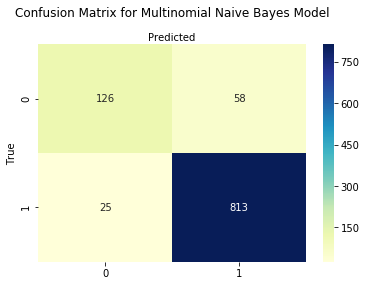

In [49]:
# Visualizations : 
# Confusion matrix plot for the multnb model : 
conf_matrix_multnb_model = metrics.confusion_matrix(Y_test, Y_pred_mult_nb)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_multnb_model), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix for Multinomial Naive Bayes Model', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted') 

Text(0.5,15,'Predicted')

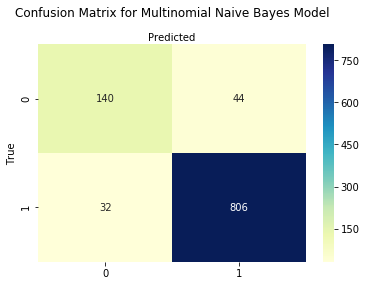

In [50]:
# Confusion matrix plot for the logistic regression model : 

conf_matrix_logreg_model = metrics.confusion_matrix(Y_test, Y_pred_logreg)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix_logreg_model), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix for Multinomial Naive Bayes Model', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted') 

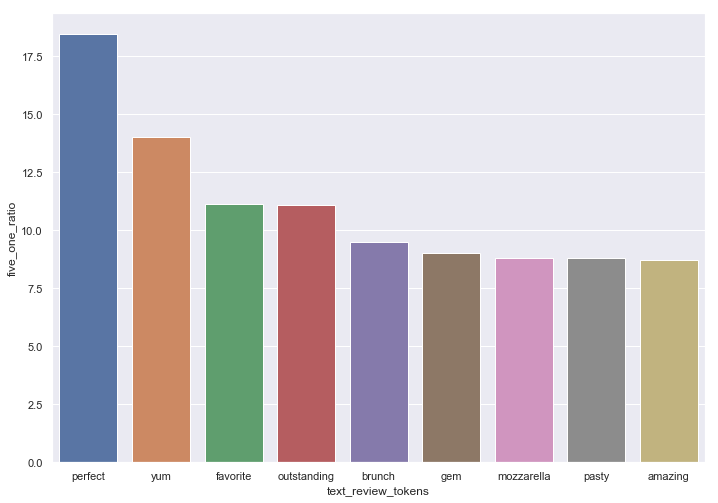

In [51]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as hist
import seaborn as sns

top_ten_fivestar_predictors = tokens_df2.sort_values('five_one_ratio',ascending=False).head(10)
top_ten_onestar_predictors = tokens_df2.sort_values('five_one_ratio',ascending=False).tail(10)


#plt.plot(top_ten_fivestar_predictors.text_review_tokens[1:10],top_ten_fivestar_predictors.five_one_ratio,type=hist)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=top_ten_fivestar_predictors.text_review_tokens[1:10], y=top_ten_fivestar_predictors.five_one_ratio, data=top_ten_fivestar_predictors)

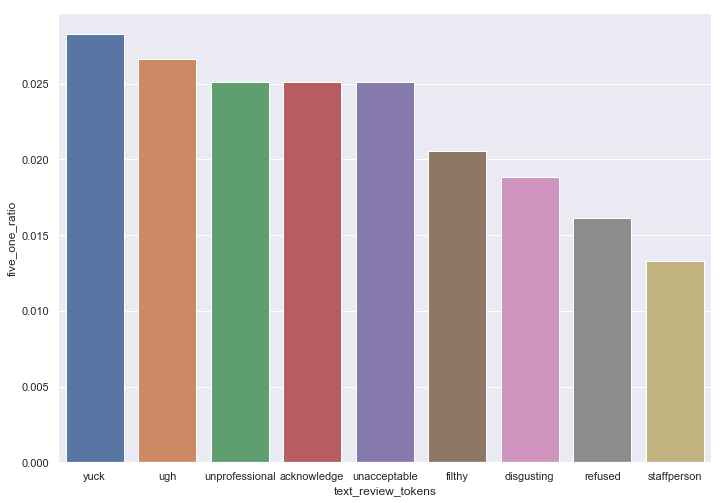

In [52]:
# Top ten token reviews that predict one star rating : 

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=top_ten_onestar_predictors.text_review_tokens[1:10], y=top_ten_onestar_predictors.five_one_ratio, data=top_ten_onestar_predictors)

In [53]:
#tokens_df2.text_review_tokens[1:10]

In [54]:
# Confusion matrix plot for the logistic regression model : 

In [55]:
#5-class classification problem

#Define X and y using the original DataFrame. (y should contain 5 different classes.)
#Split X and y into training and testing sets.
#Create document-term matrices using CountVectorizer.
#Calculate the testing accuracy of a Multinomial Naive Bayes model.
#Compare the testing accuracy with the null accuracy, and comment on the results.
#Print the confusion matrix, and comment on the results. (This Stack Overflow answer explains how to read a multi-class confusion matrix.)
#Print the classification report, and comment on the results. 
#If you are unfamiliar with the terminology it uses, research the terms, and then try to figure out how to 
#calculate these metrics manually from the confusion matrix!

# encountering a problem : my computer cant handle this apparently.

In [56]:
#yelp_final.columns

In [57]:
# initialize the data : 
#X = yelp_data.text
#Y = yelp_data.stars

In [58]:
# initialize training and testing datasets : 
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [59]:
# initialize a new countvectorizer
#from sklearn.feature_extraction.text import CountVectorizer

# instantiate new countvec
#countvec_new = CountVectorizer()

# train the data 
#countvec_new.fit(X_train)   

In [60]:
# get the feature names 
#countvec_new.get_feature_names()

# memory taken alot so the code and output commented. 


In [61]:
# now convert to get document term matrix for training and testing datasets 
#X_train_dtm_2 = countvec_new.transform(X_train)

In [62]:
# look at the array
#X_train_dtm_2.toarray(5)

In [63]:
# get the pandas dataframe having column names as learnt vocab and rows representing the statements/text

#X_train_dtm_df_2 = pd.DataFrame(X_train_dtm_2.toarray(), columns=countvec_new.get_feature_names())
#

In [64]:
#X_train_dtm_df_2.shape

In [65]:
# get dtm for test data
#X_test_dtm_2=countvec_new.transform(X_test)

# create pandas df : 
#X_test_dtm_df_2 = pd.DataFrame(X_test_dtm_2.toarray(), columns = countvec_new.get_feature_names())

#X_test_dtm_df_2.head(5)


In [66]:
# create the ML model 
#from sklearn.naive_bayes import MultinomialNB

#mult_nb_2 = MultinomialNB()

#%time mult_nb_2.fit(X_train_dtm_df_2, Y_train)
# cannot run 5 class prediction problem - the computer hangs - too resource intensive. 

In [67]:
#Y_pred_mult_nb_multiclass = mult_nb_2.predict(X_test_dtm_df_2)